In [1]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import os
import torch  # type: ignore
print(torch.cuda.is_available())
print(torch.__version__)
import torch.nn as nn # type: ignore
import torch.optim as optim # type: ignore
from torch.utils.data import TensorDataset, DataLoader # type: ignore
from sklearn.model_selection import train_test_split # type: ignore



False
2.6.0


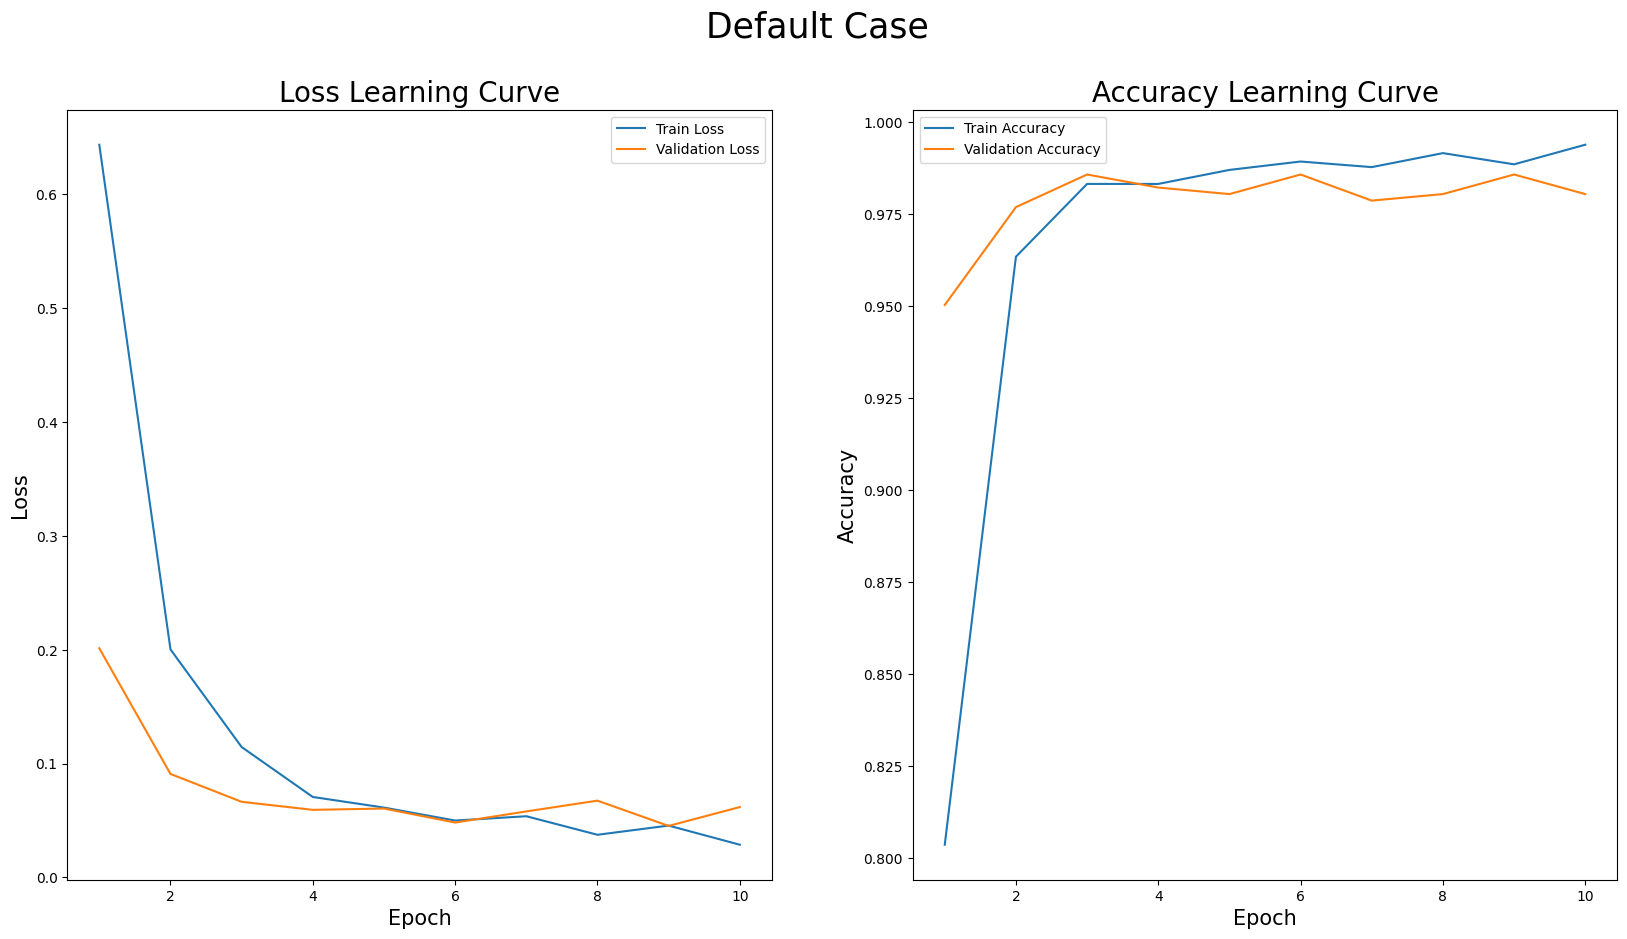

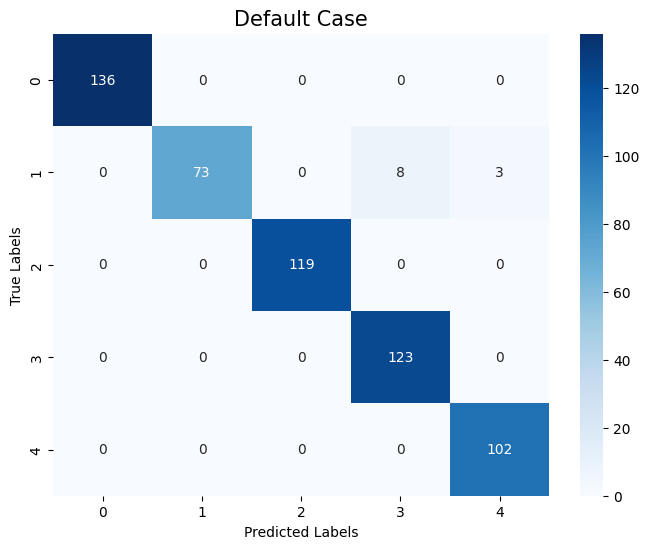

In [2]:
from src.data_loader import CustomDataset
from src.model import MLP
from src.evaluate import evaluate_model

data_train = CustomDataset(train=True)

X = data_train.data_transformed
y = data_train.target_transformed

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42) 

input_dim = X_train.shape[1]
num_classes = len(torch.unique(y_train))

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)



model = MLP(input_dim=input_dim, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



metrics = evaluate_model(
    train_dataset=train_dataset,
    val_dataset=val_dataset,
    title='Default Case',
    plot_heatmap=True,
    batch_size=20,
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    num_of_epochs=10
)


# Learning rate

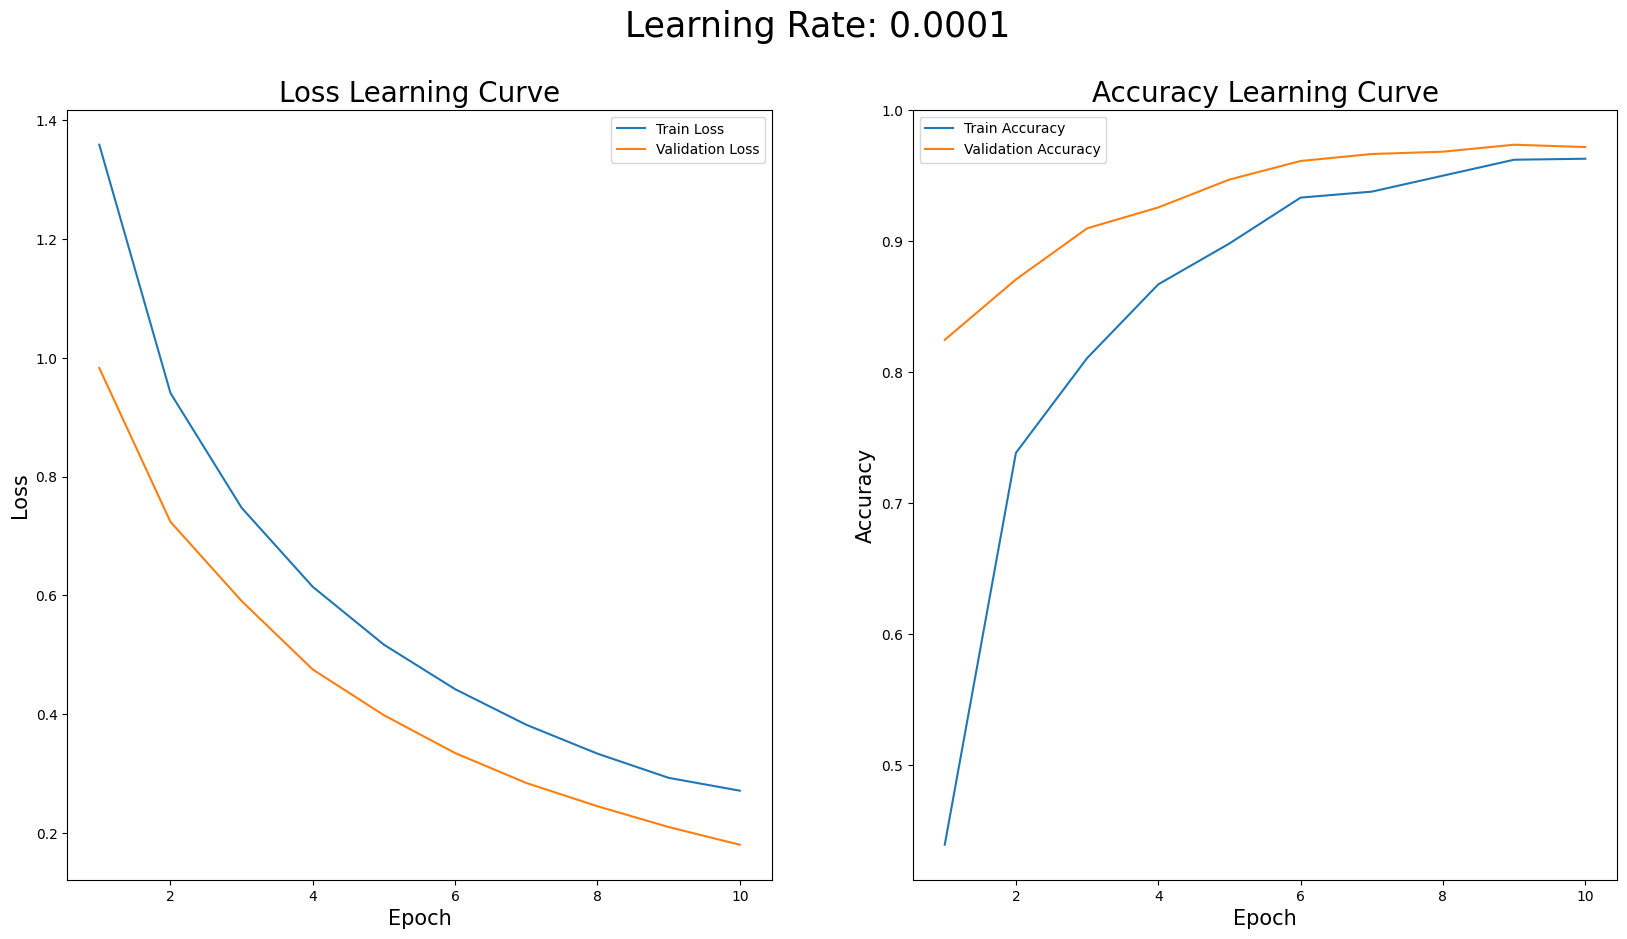

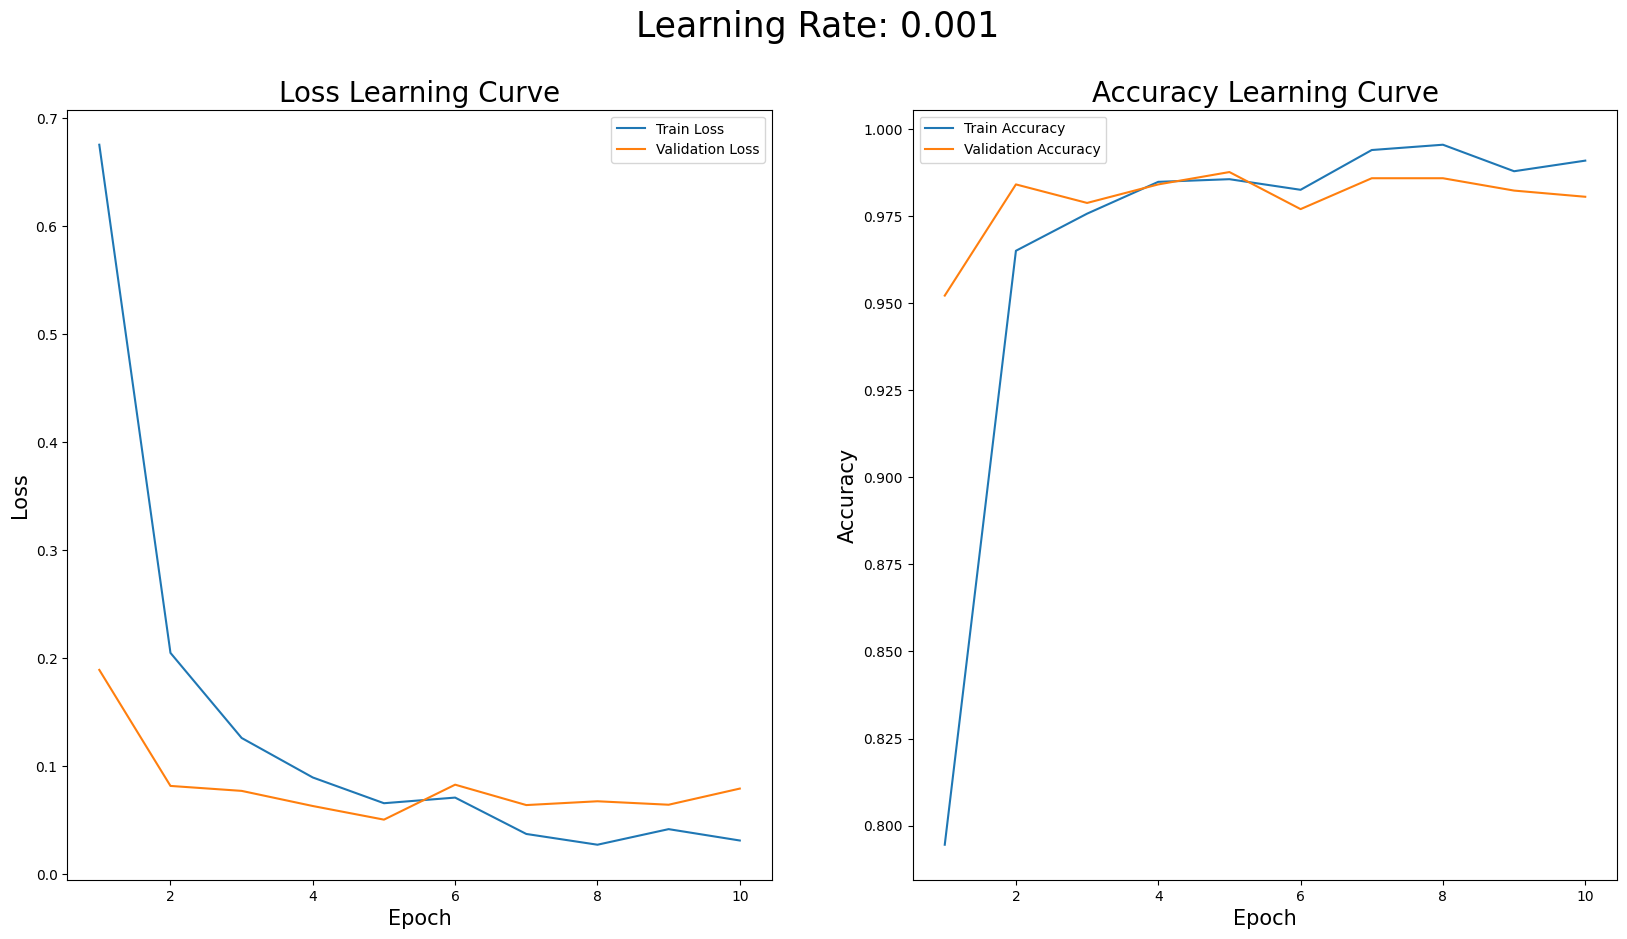

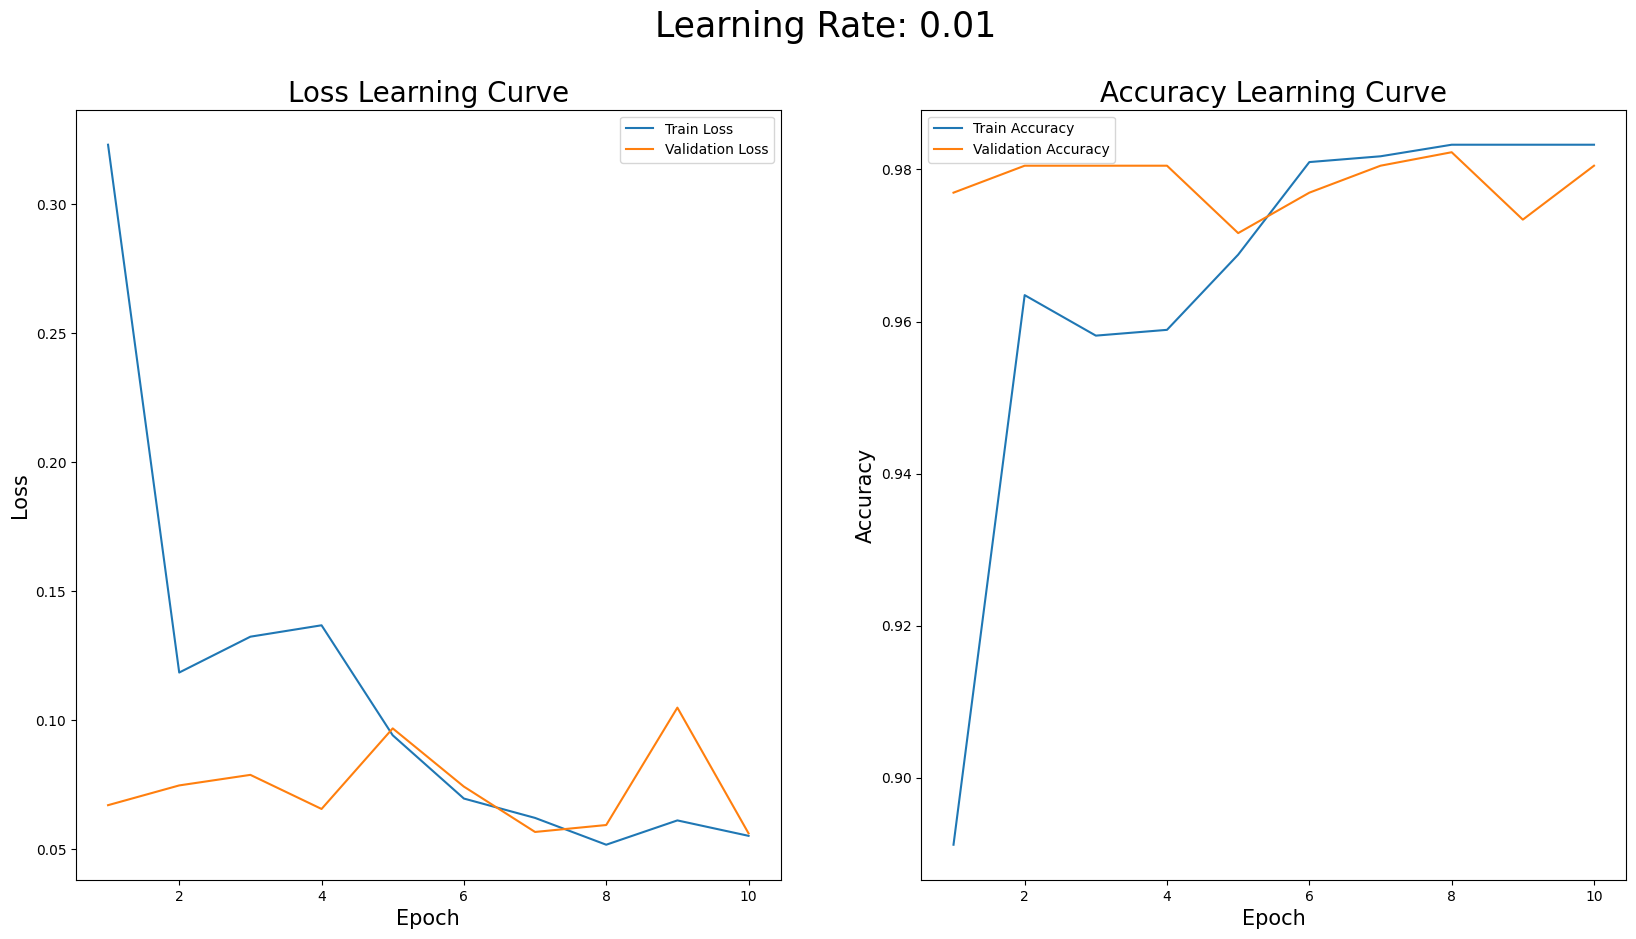

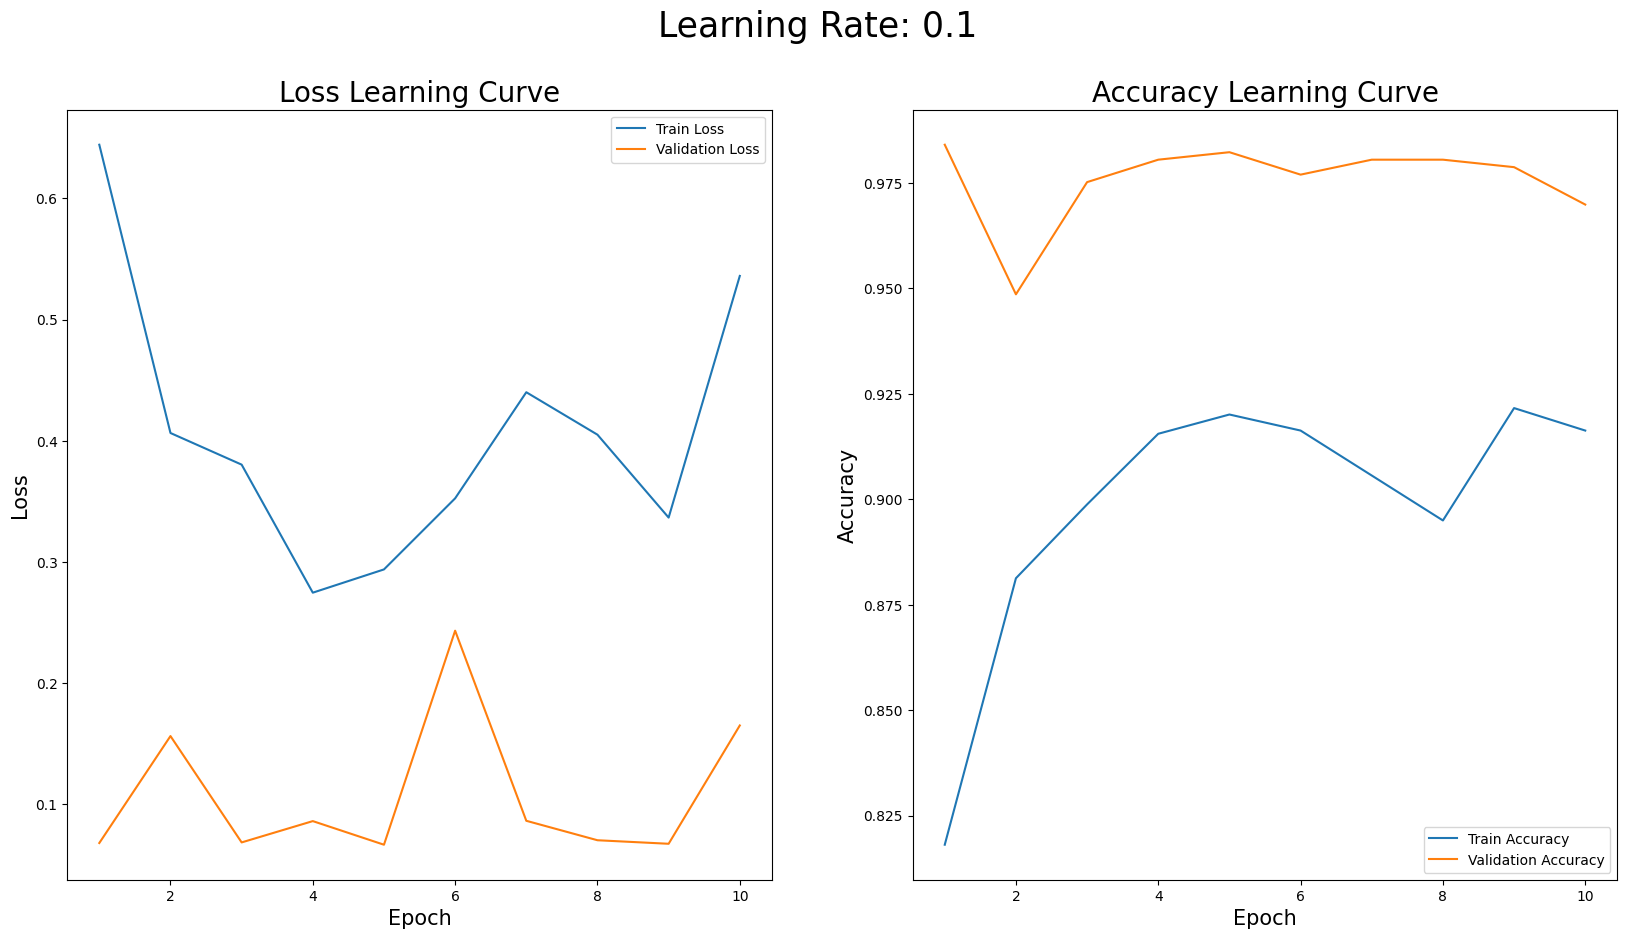

In [3]:
learing_rates = [0.0001, 0.001, 0.01, 0.1]
for lr in learing_rates:
    model = MLP(input_dim=input_dim, num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    metrics = evaluate_model(
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        title=f'Learning Rate: {lr}',
        plot_heatmap=False,
        batch_size=20,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        num_of_epochs=10
    )

# Batch size 

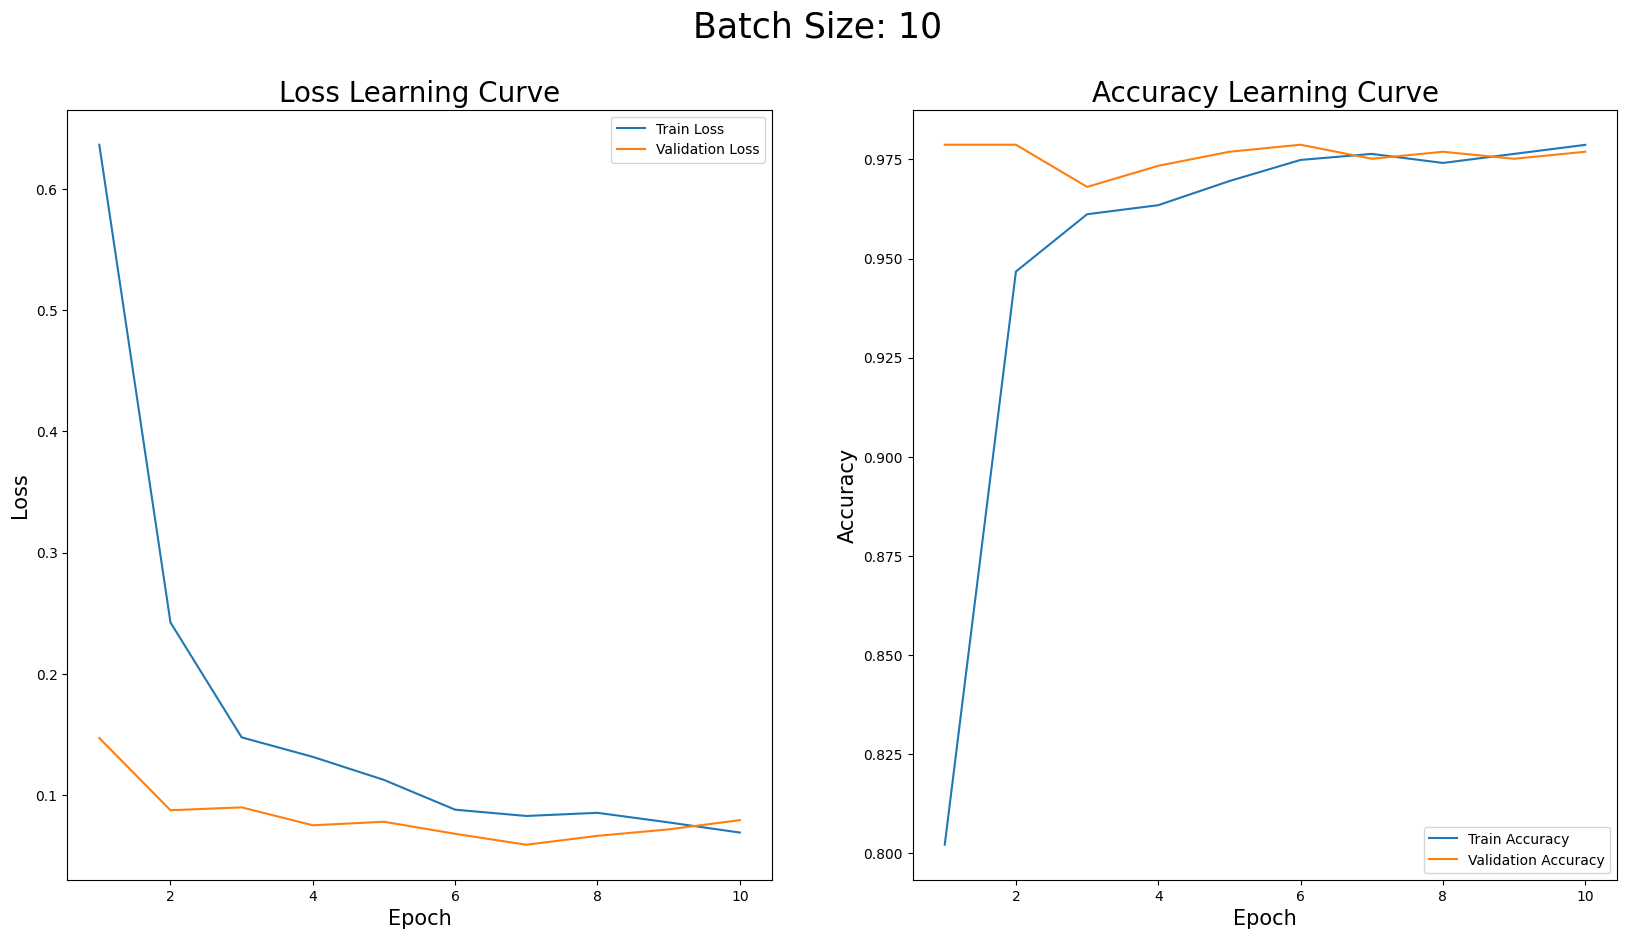

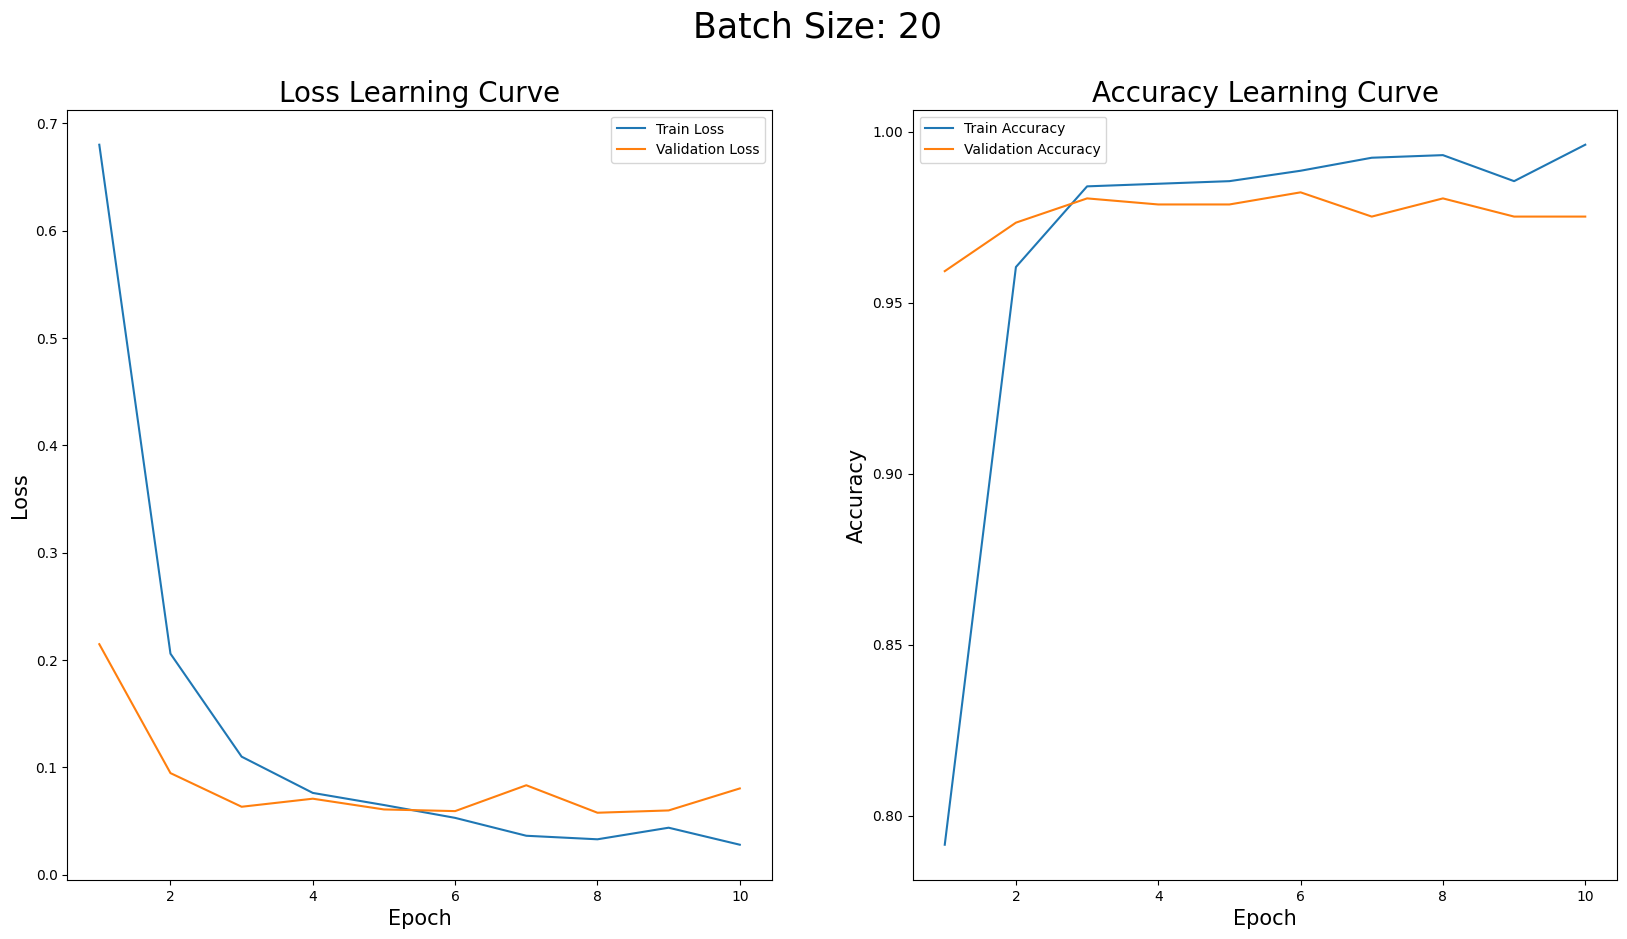

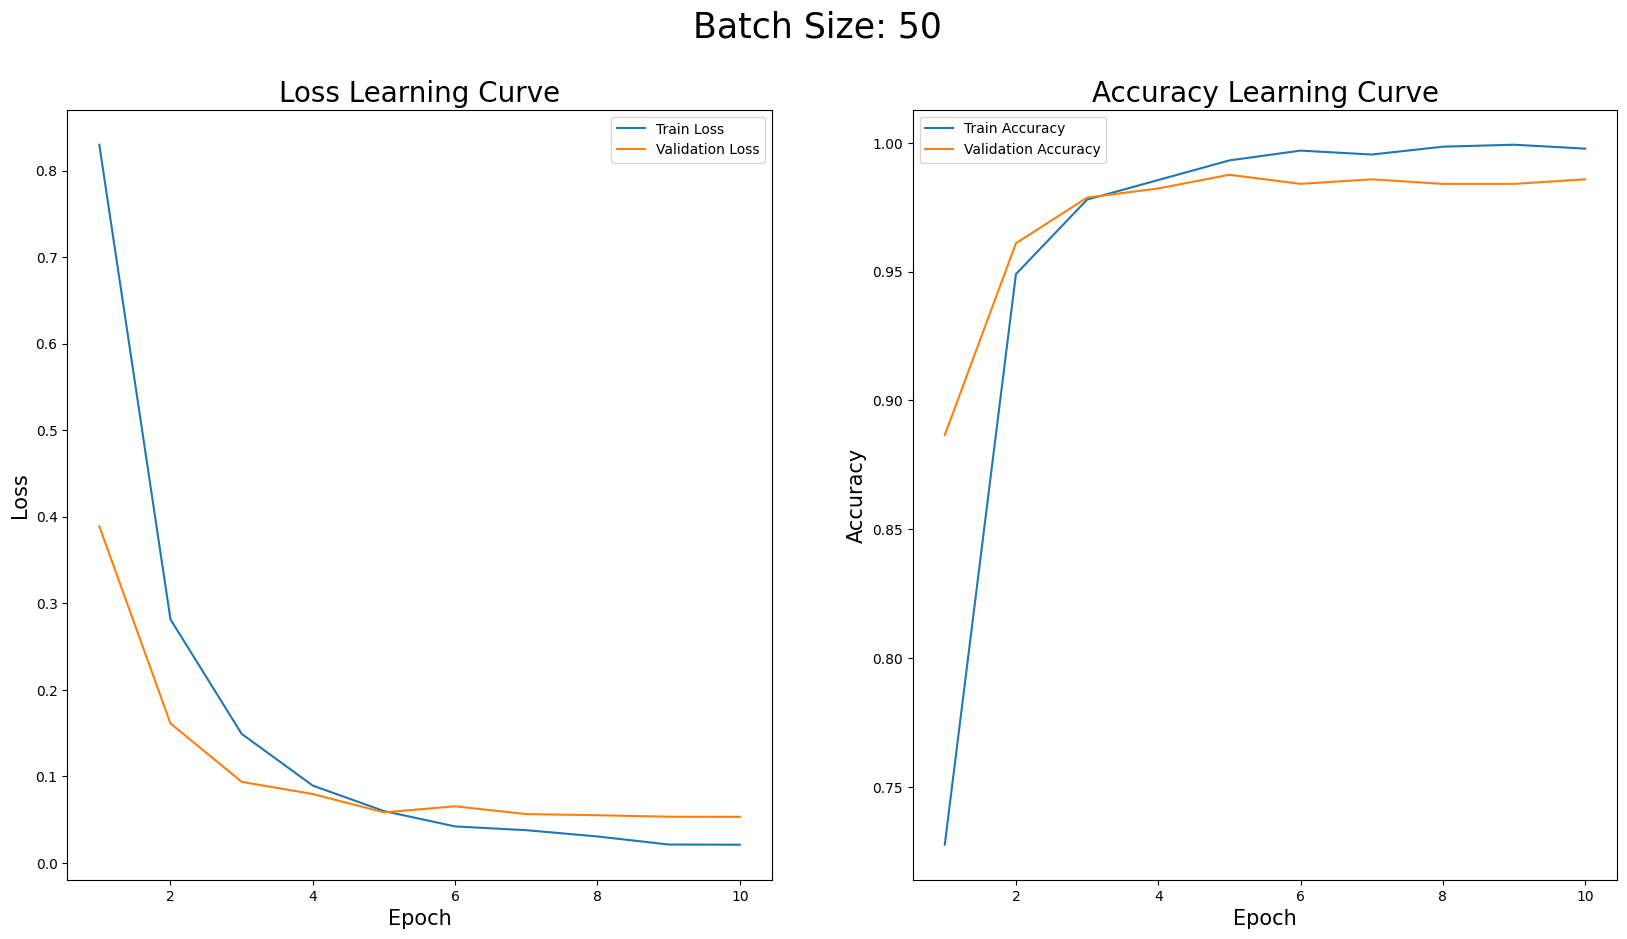

In [5]:
batch_sizes = [10,20,50]
for bs in batch_sizes:
    model = MLP(input_dim=input_dim, num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    metrics = evaluate_model(
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        title=f'Batch Size: {bs}',
        plot_heatmap=False,
        batch_size=bs,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        num_of_epochs=10
    )

# Hidden Layers

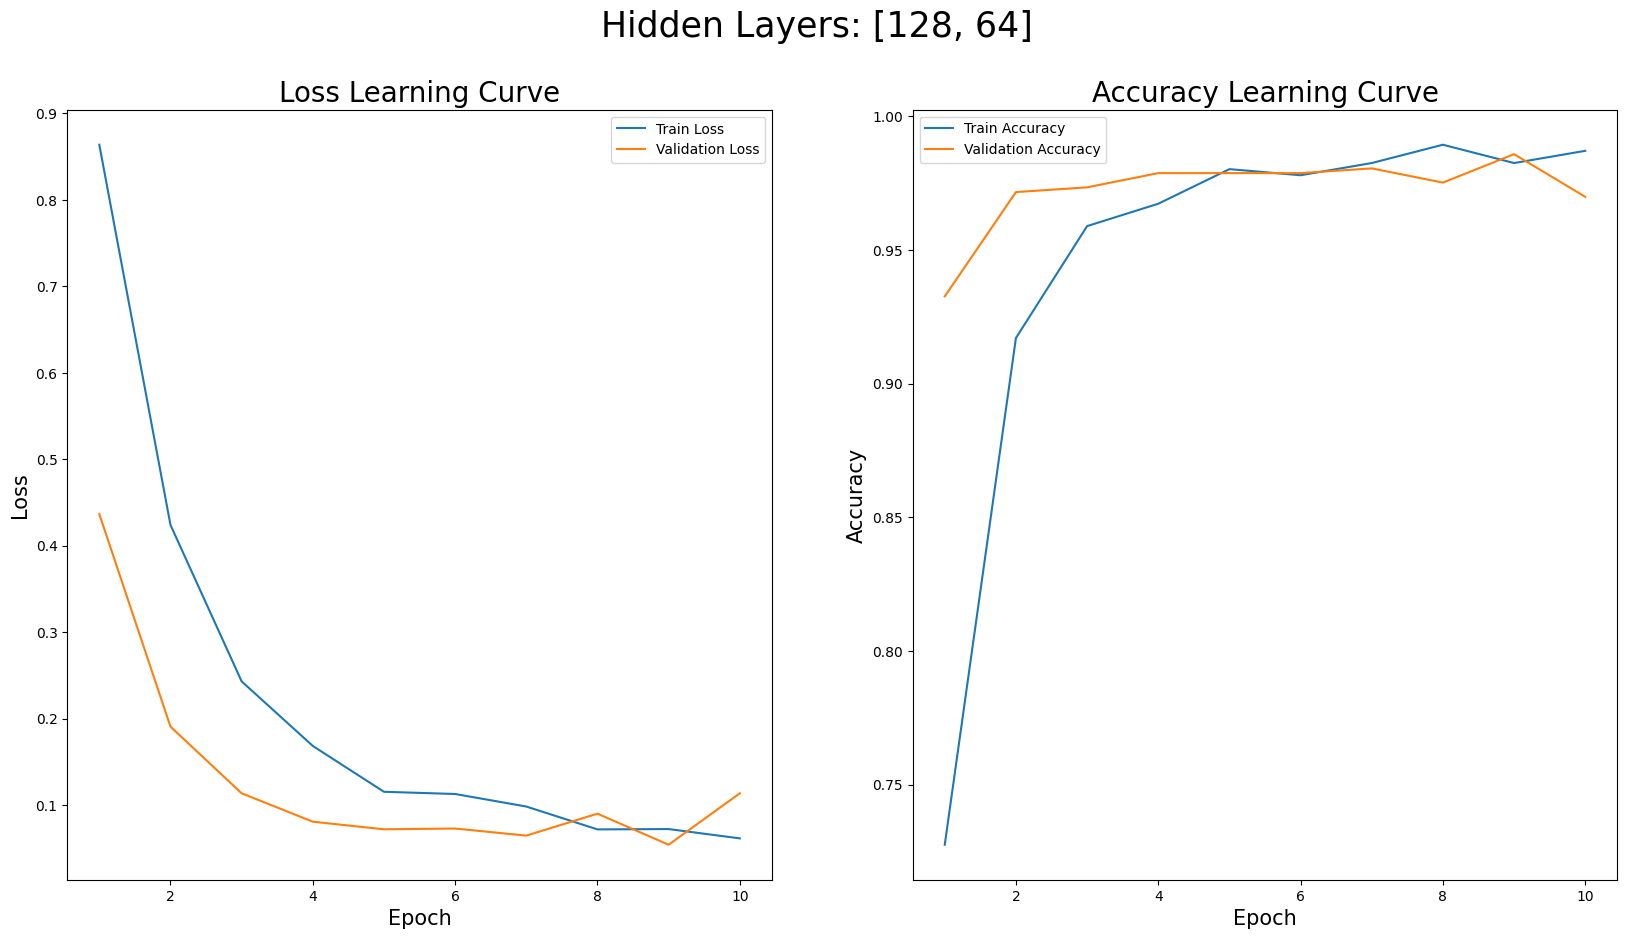

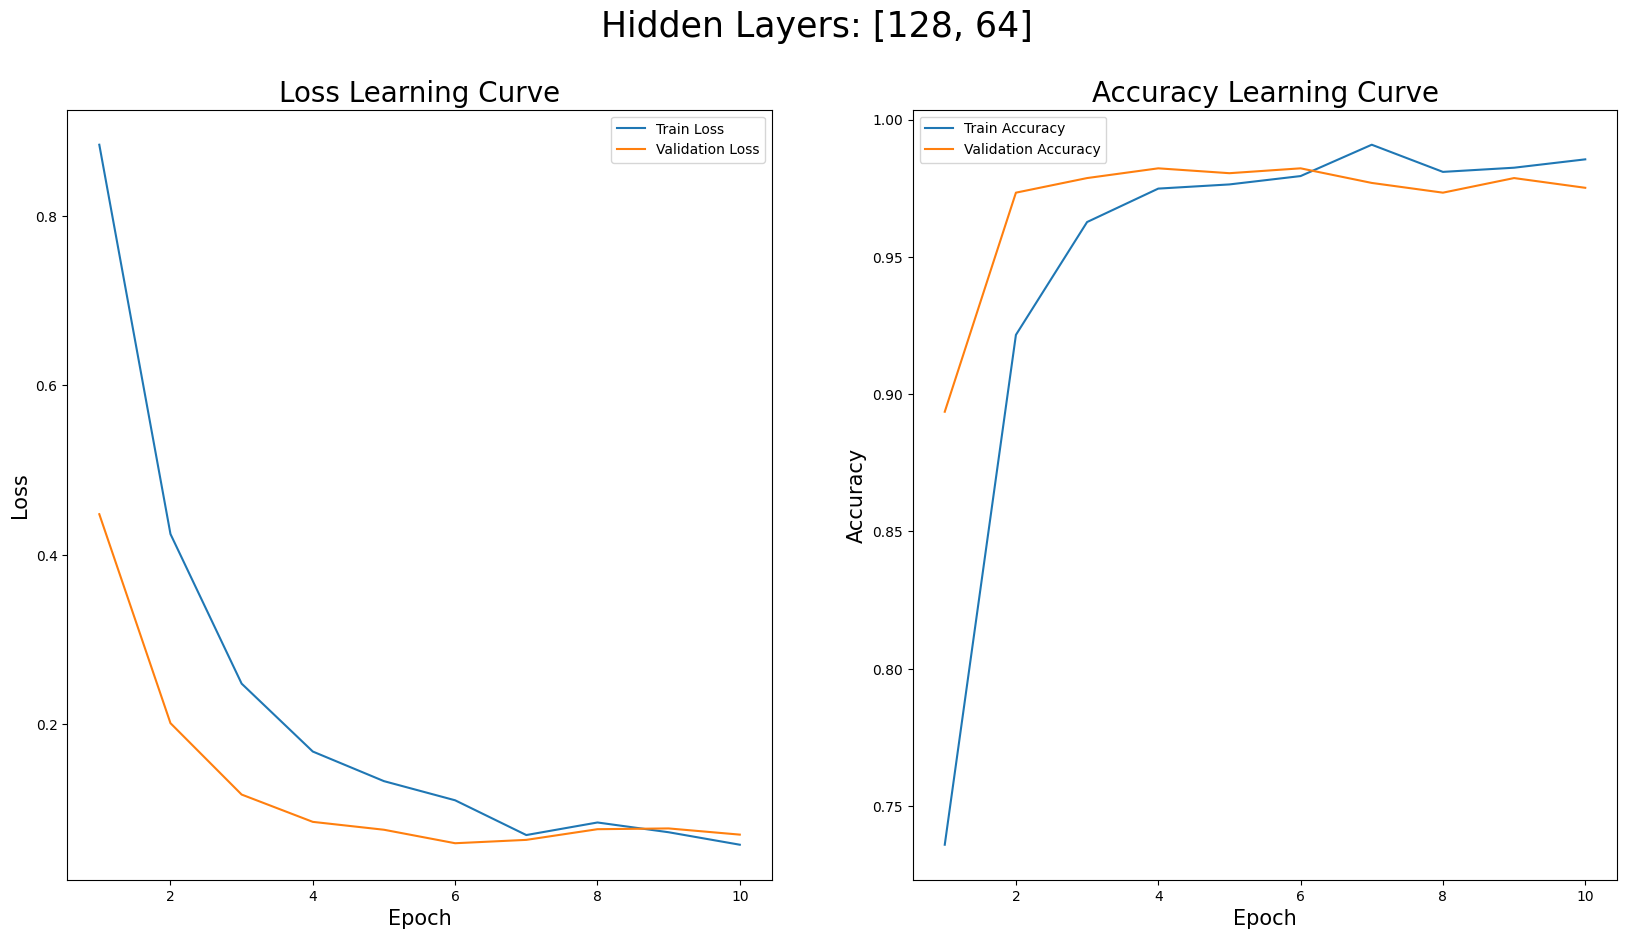

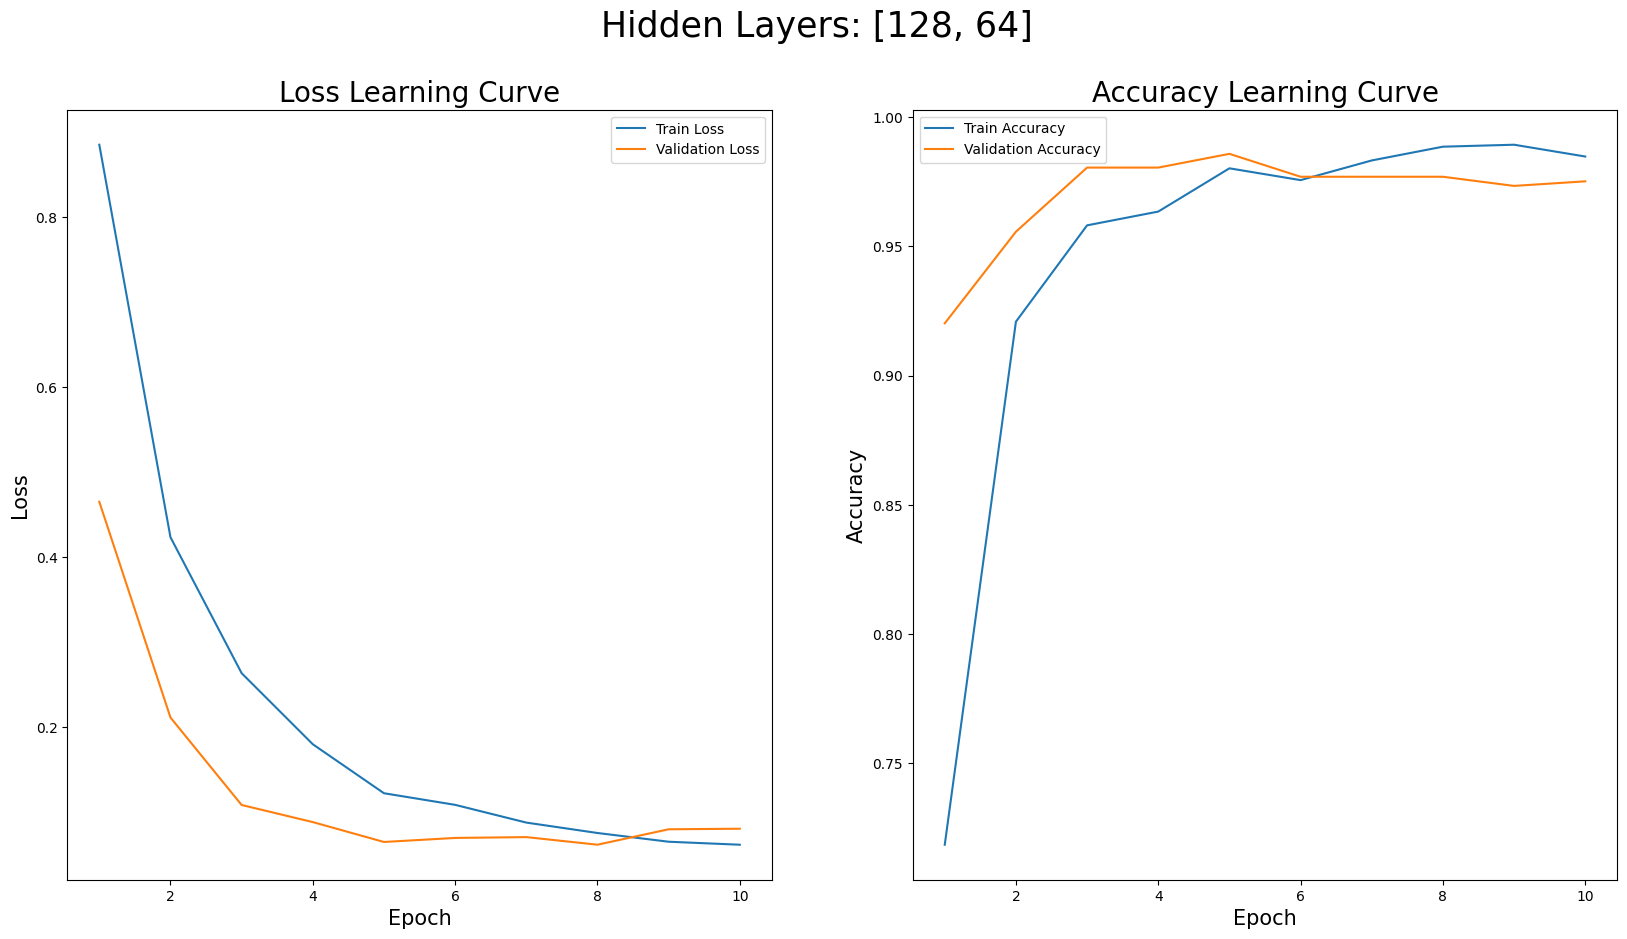

In [7]:
hidden_layers_dims = [
    [128, 64],
    [256, 128, 64],
    [512, 256, 128, 64]
]

for hld in hidden_layers_dims:
    model = MLP(input_dim=input_dim, num_classes=num_classes, hidden_dims=hl)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    metrics = evaluate_model(
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        title=f'Hidden Layers: {hl}',
        plot_heatmap=False,
        batch_size=20,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        num_of_epochs=10
    )




# Optimizers

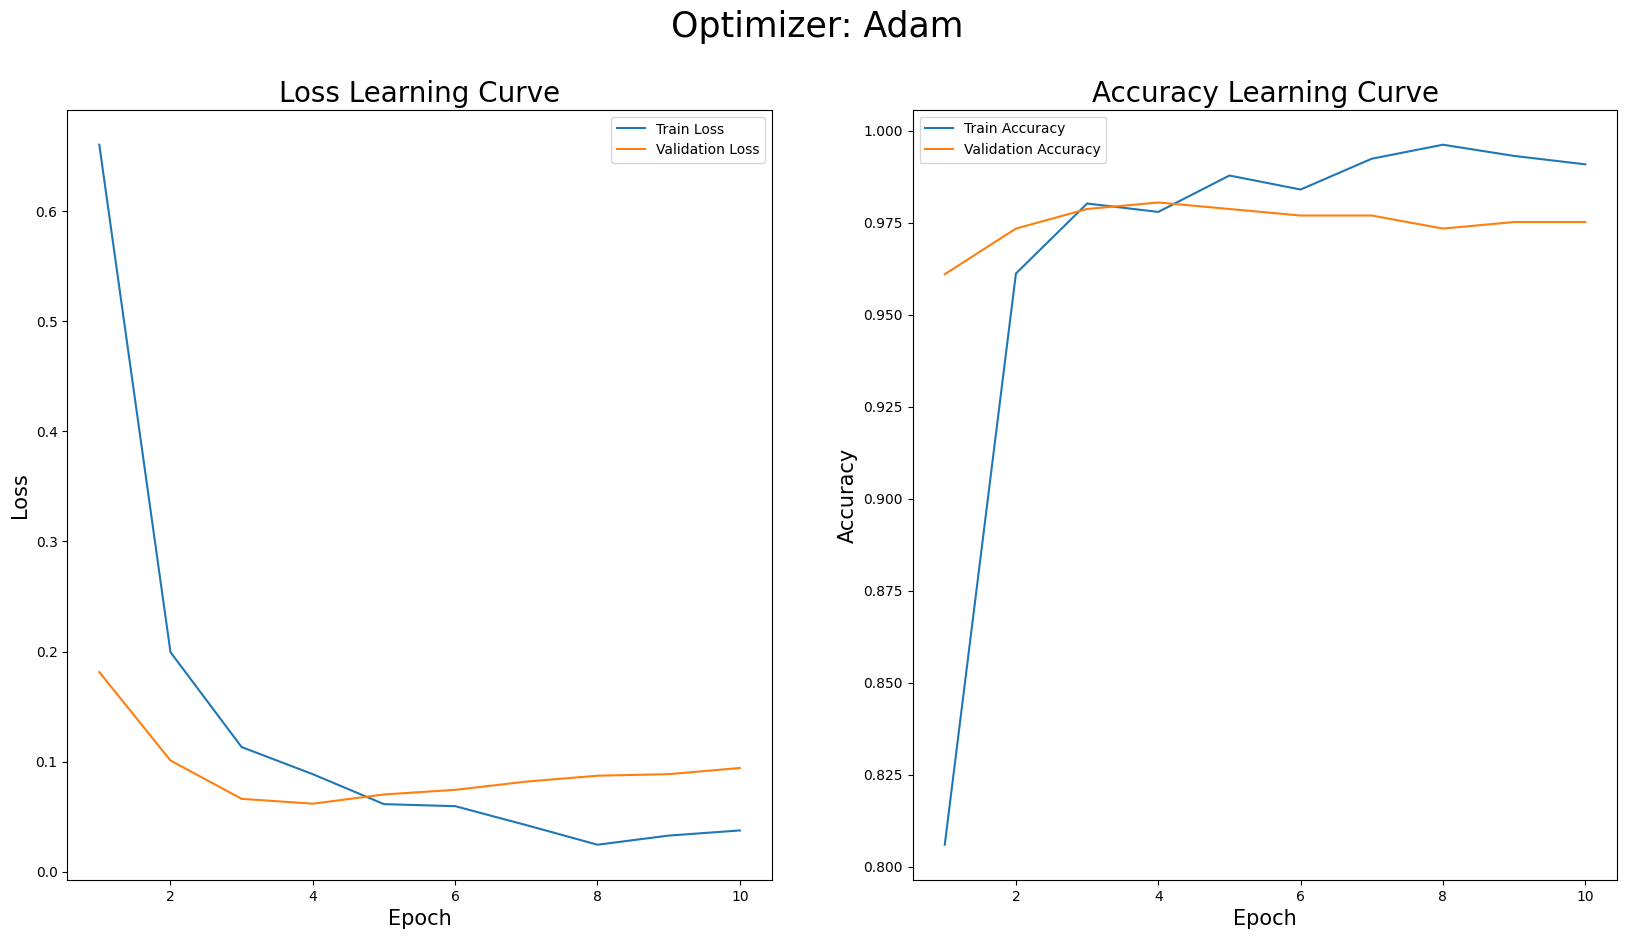

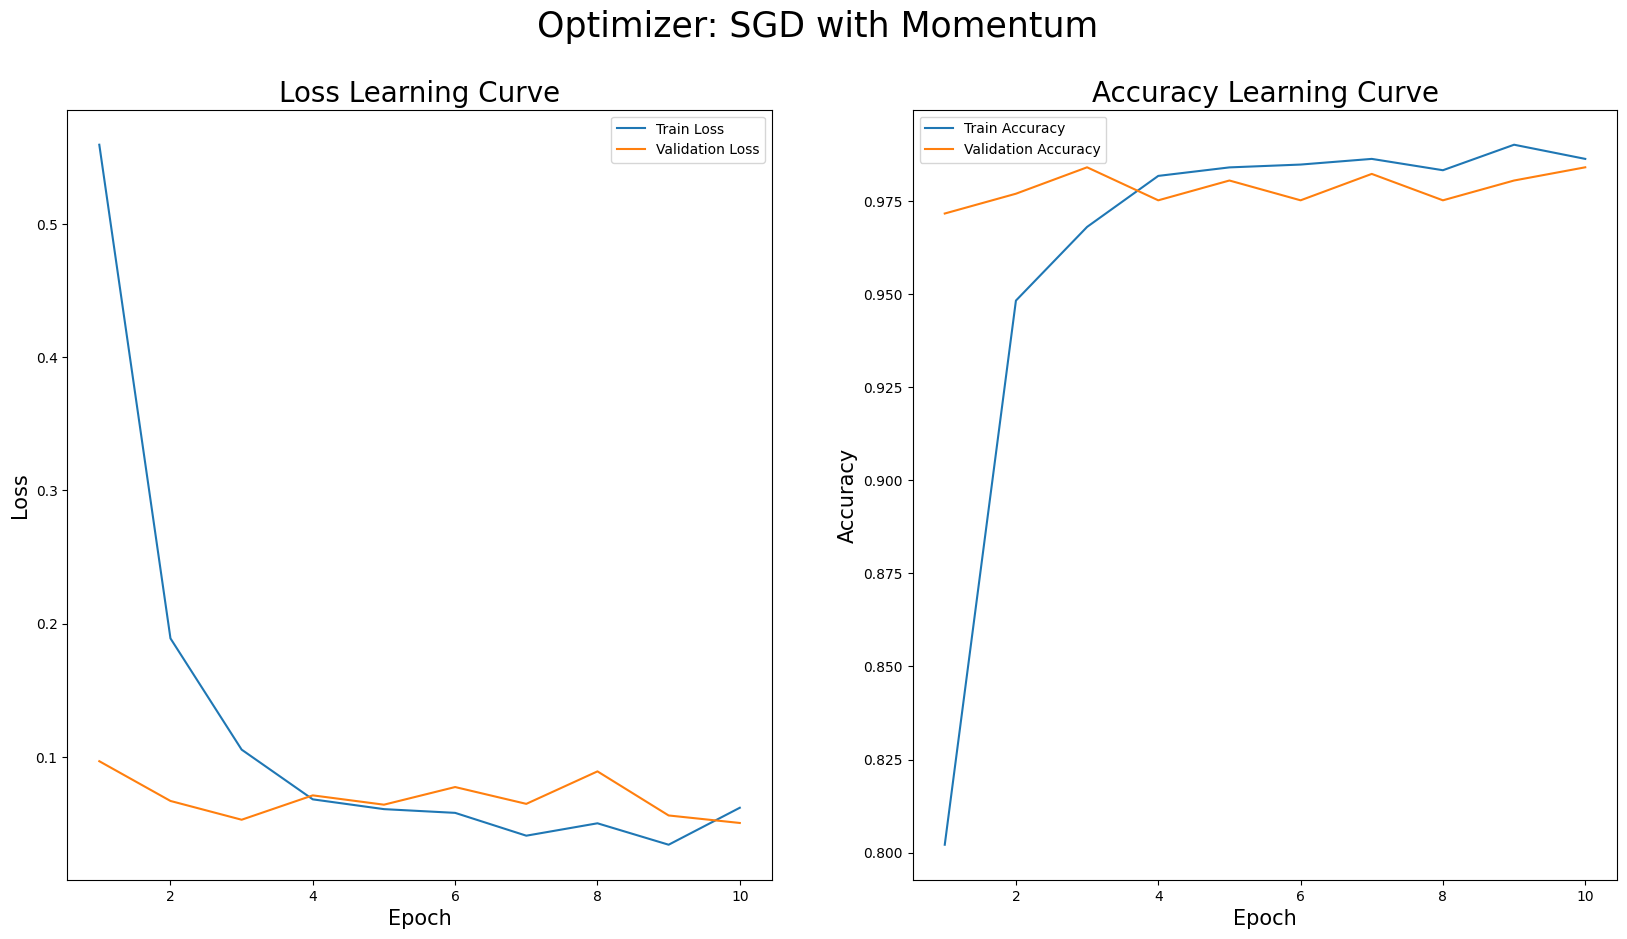

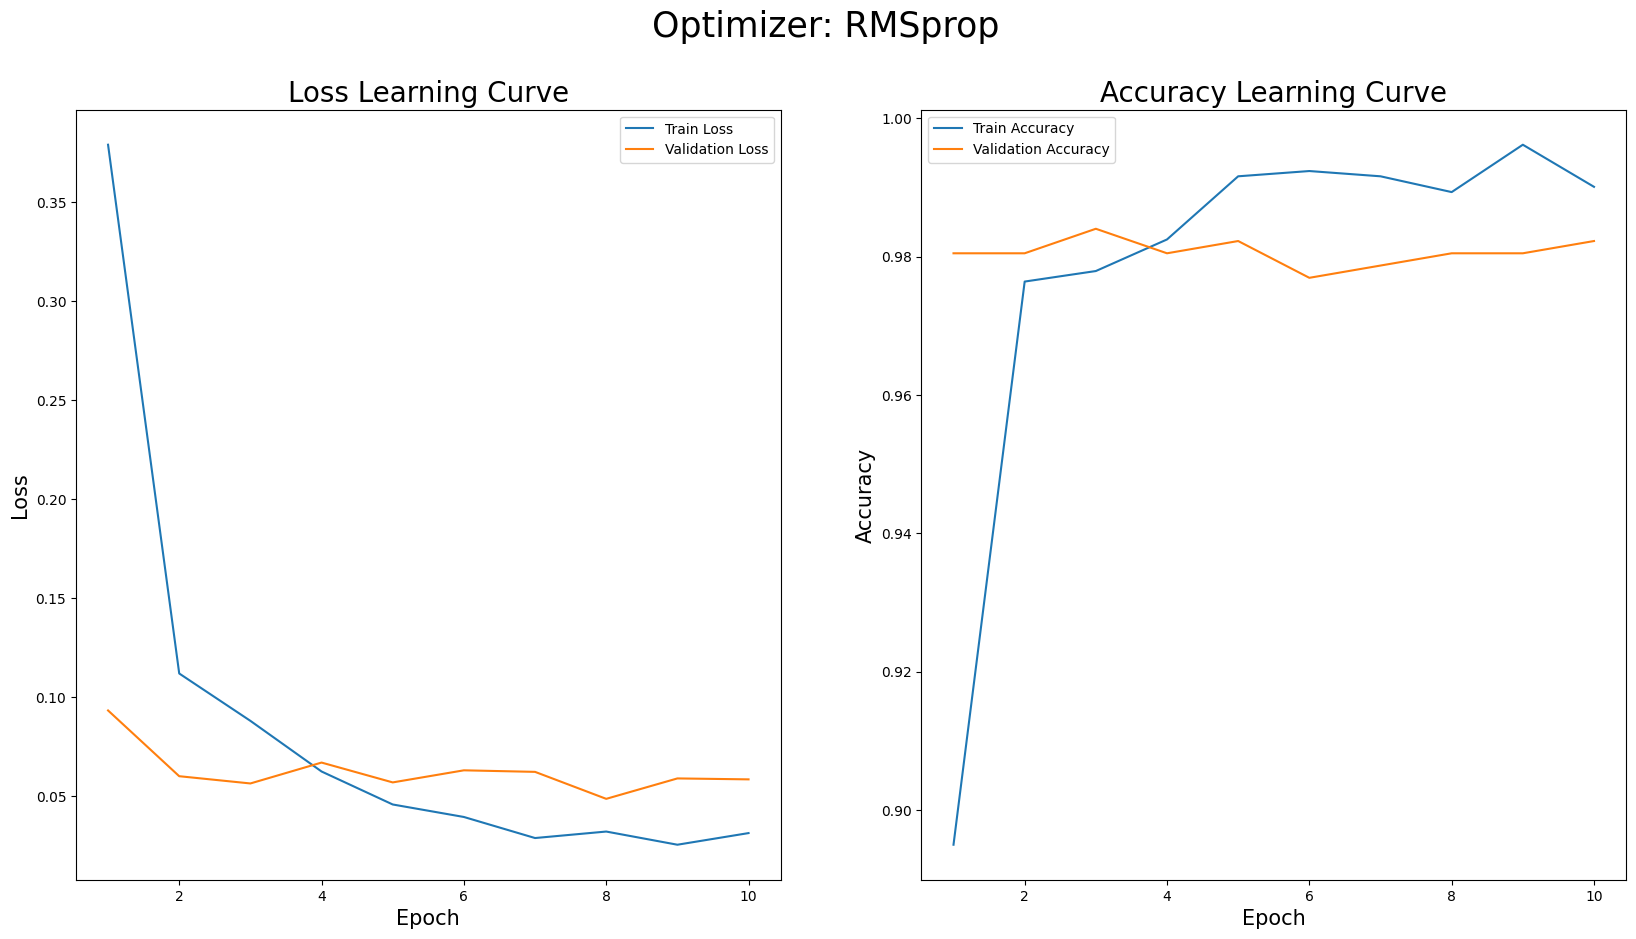

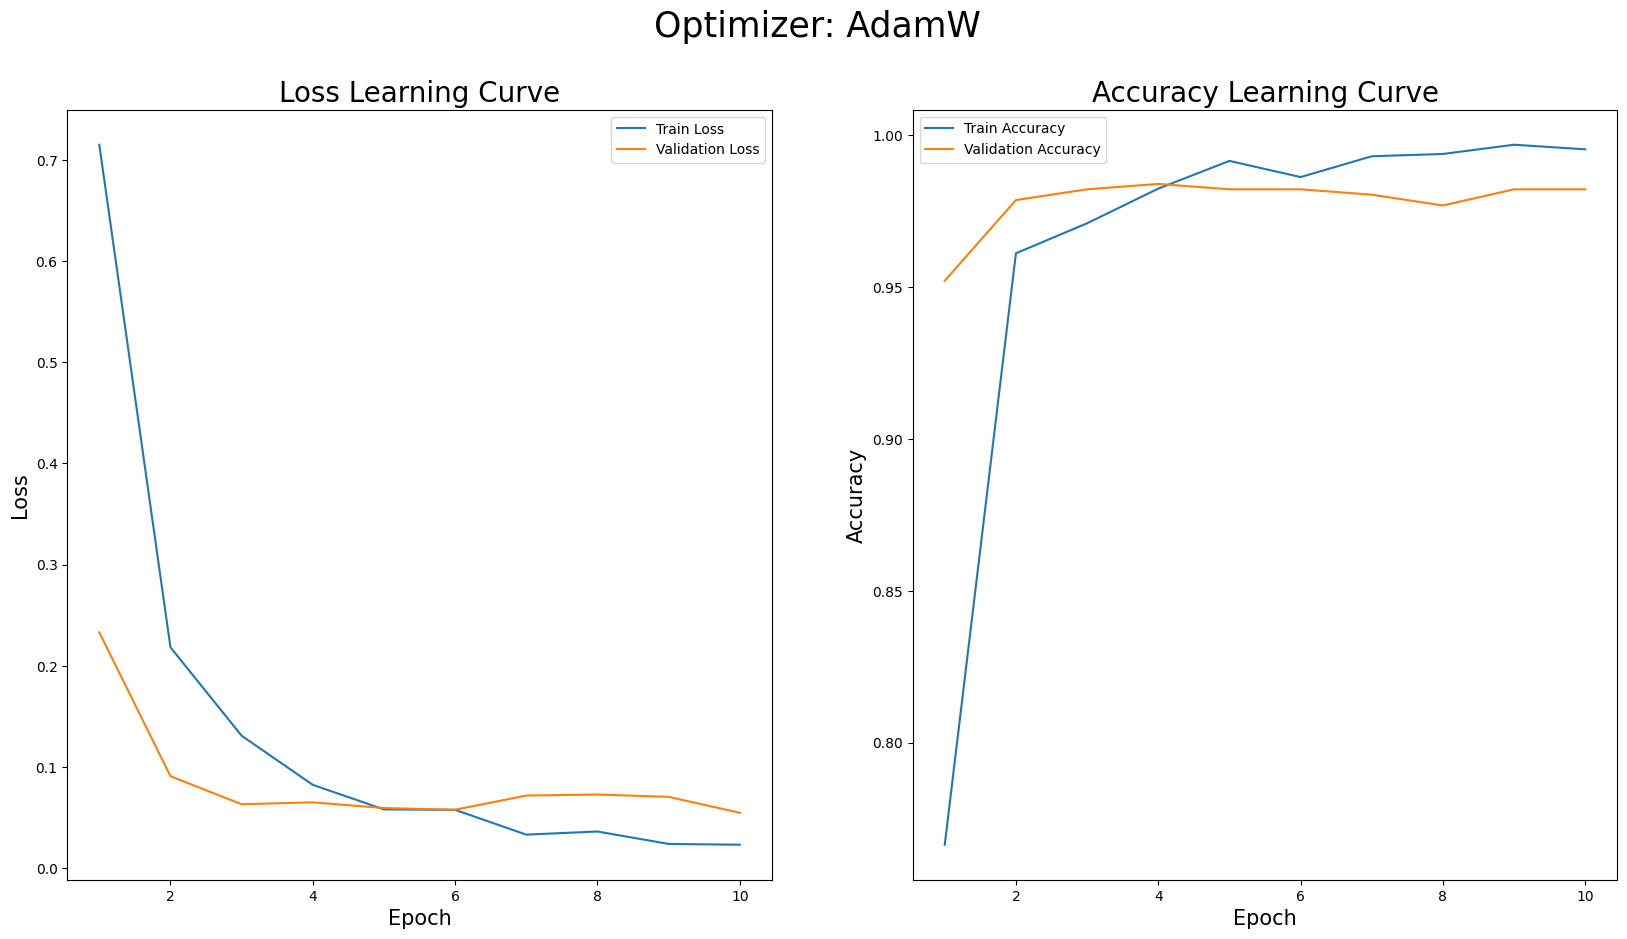

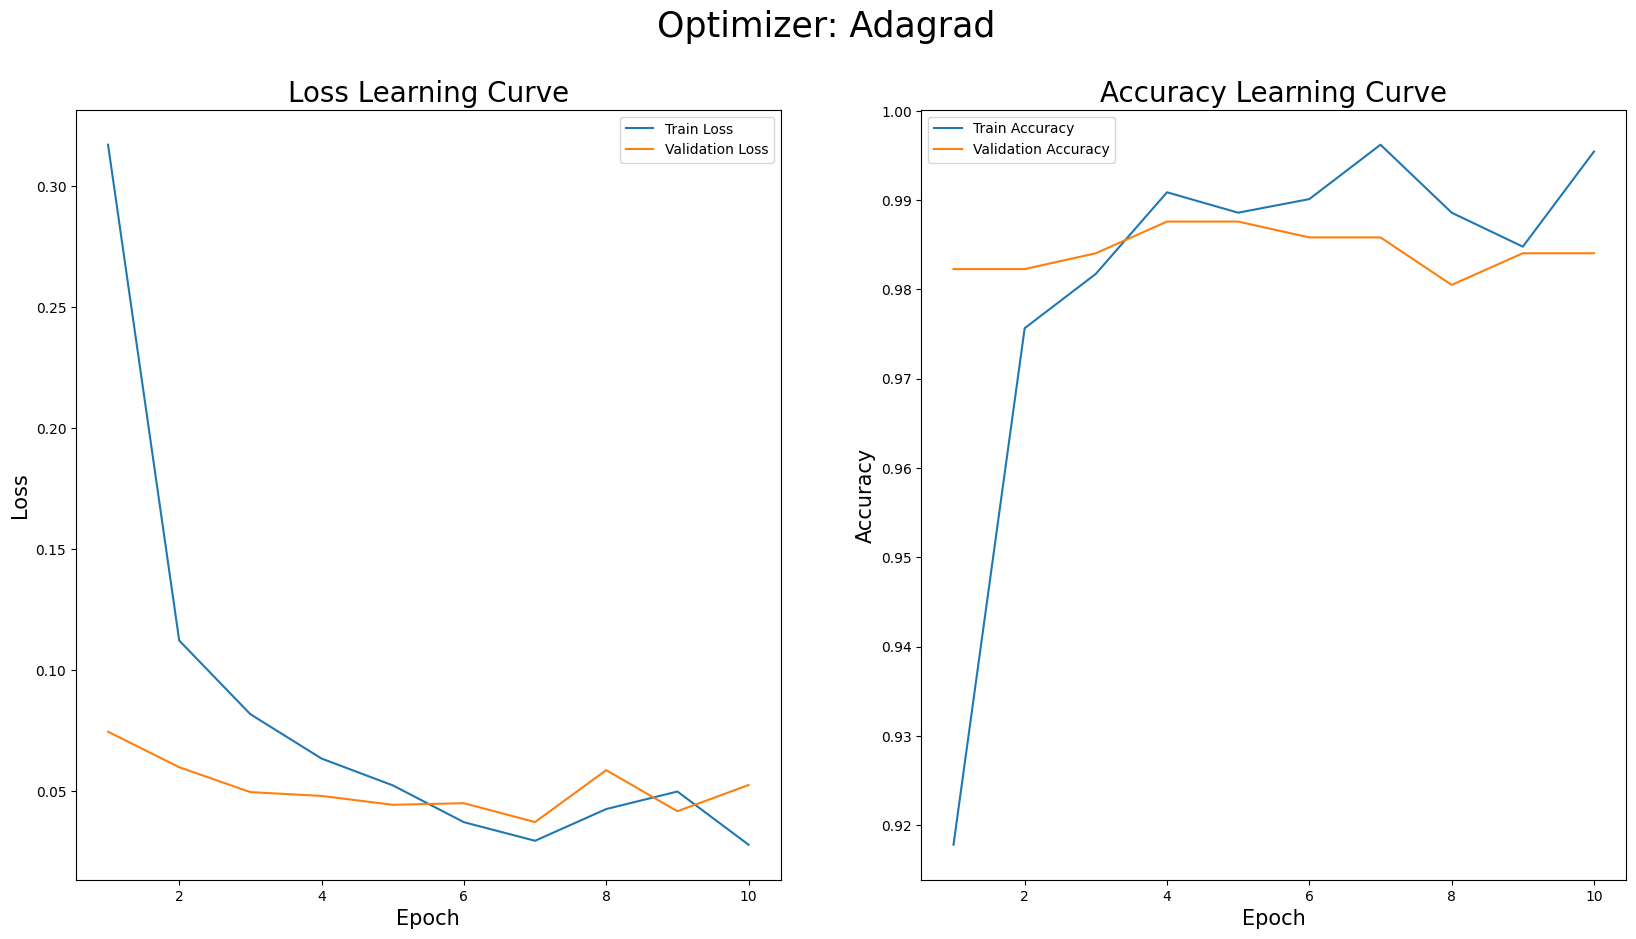

In [10]:
optimizers_to_try = [
    ("Adam", optim.Adam, {"lr": 0.001}),
    ("SGD with Momentum", optim.SGD, {"lr": 0.01, "momentum": 0.9}),
    ("RMSprop", optim.RMSprop, {"lr": 0.001, "alpha": 0.99}),
    ("AdamW", optim.AdamW, {"lr": 0.001}),
    ("Adagrad", optim.Adagrad, {"lr": 0.01})
]

for opt_name, opt_class, opt_params in optimizers_to_try:

    model = MLP(input_dim=input_dim, num_classes=num_classes, hidden_dims=[256, 128], dropout_rate=0.5)
    optimizer = opt_class(model.parameters(), **opt_params)
    
    metrics = evaluate_model(
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        title=f"Optimizer: {opt_name}",
        batch_size=20,
        plot_heatmap=False,
        model=model,
        criterion=nn.CrossEntropyLoss(),  # Using a common loss function for all tests
        optimizer=optimizer,
        num_of_epochs=10
    )

# Loss function


Training with loss function: CrossEntropyLoss


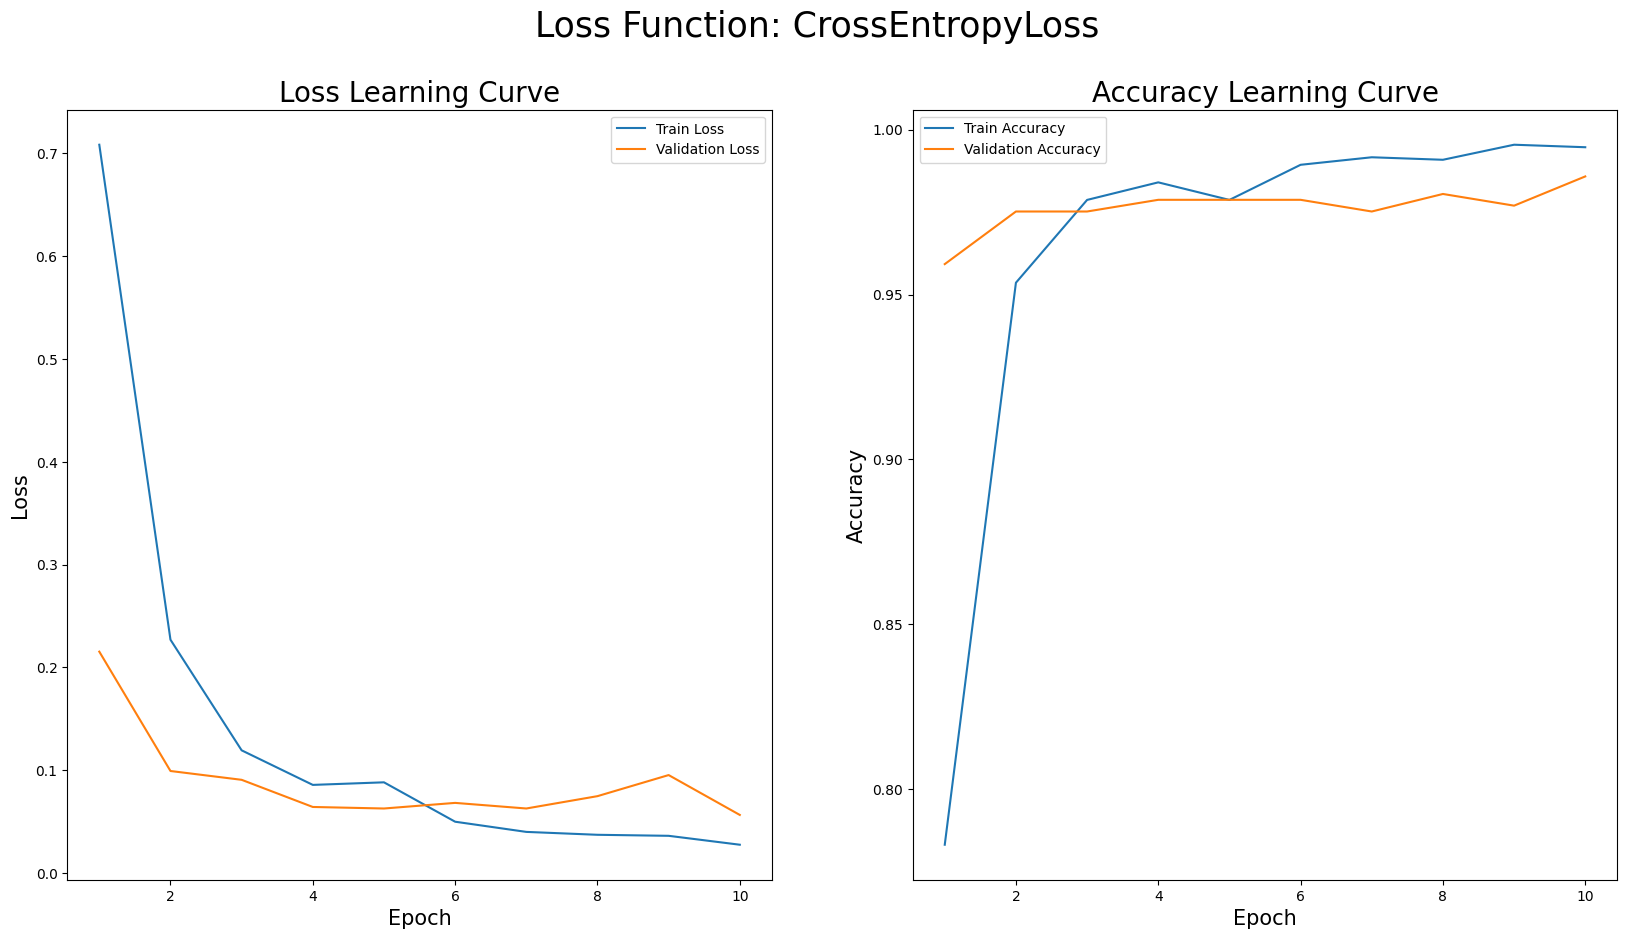

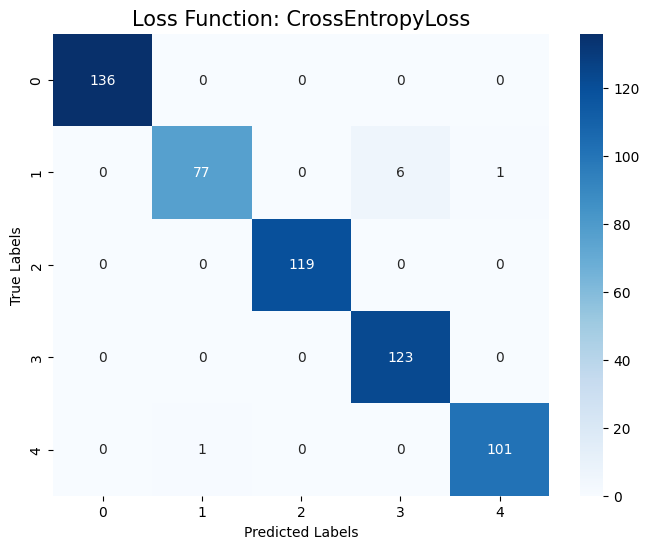


Training with loss function: MultiMarginLoss


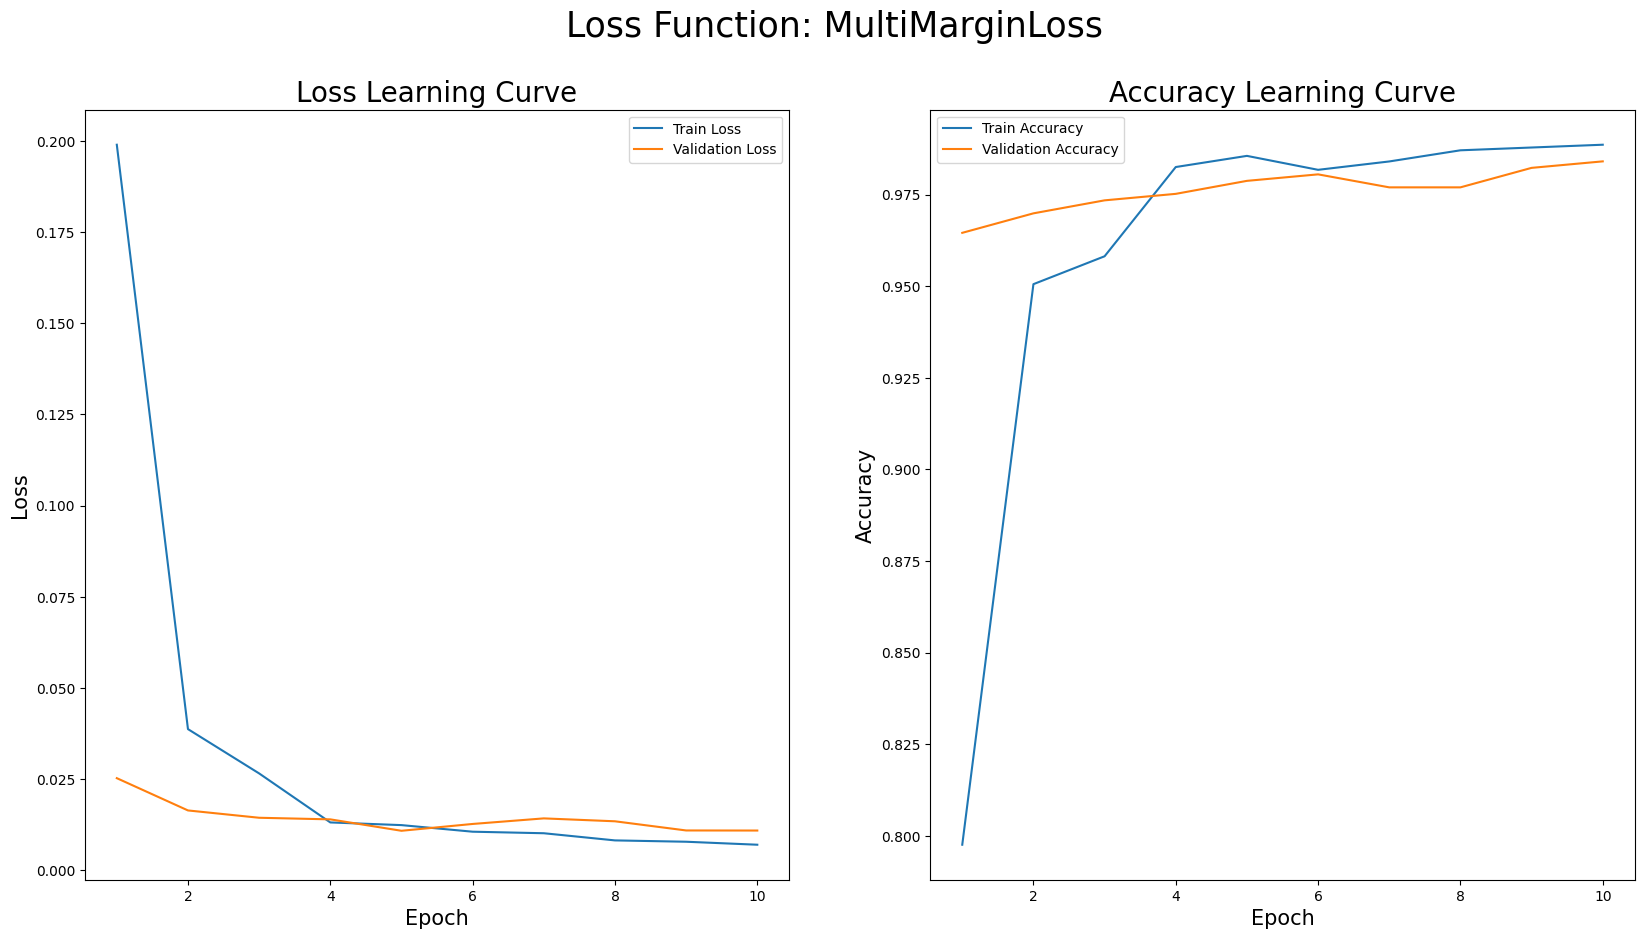

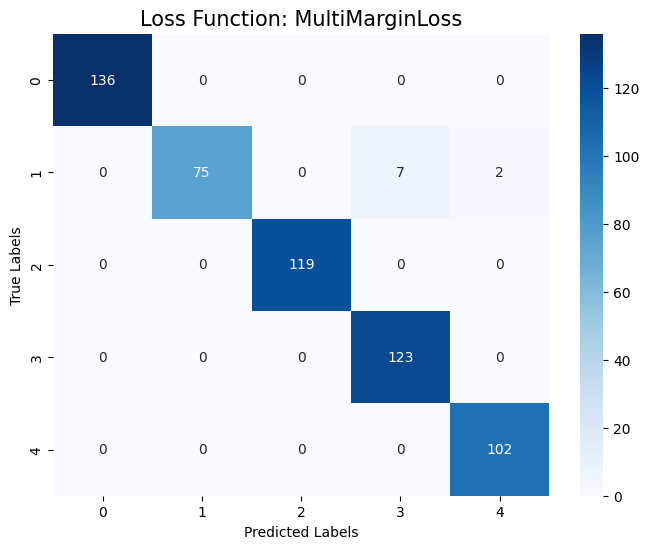

In [11]:
loss_functions_to_try = [
    ("CrossEntropyLoss", nn.CrossEntropyLoss, {}),  # Works with raw logits
    ("MultiMarginLoss", nn.MultiMarginLoss, {})       # Uses default settings
]

for loss_name, loss_class, loss_params in loss_functions_to_try:
    # Create a fresh model for each experiment.
    model = MLP(input_dim=input_dim, num_classes=num_classes, hidden_dims=[256, 128], dropout_rate=0.5)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = loss_class(**loss_params)
    
    print(f"\nTraining with loss function: {loss_name}")
    metrics = evaluate_model(
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        title=f"Loss Function: {loss_name}",
        batch_size=20,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        num_of_epochs=10
    )
    # Optionally, store the metrics for further analysis.
